   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

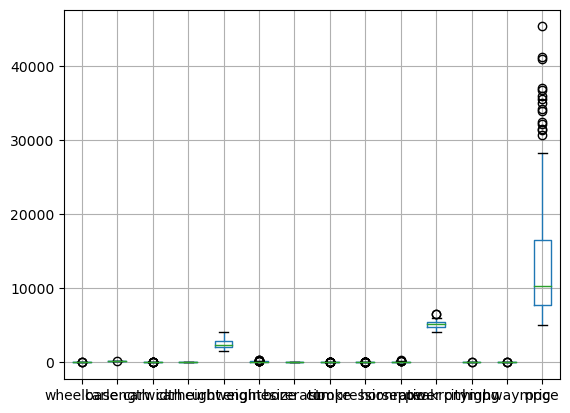

(161, 26)
car_ID              161
symboling             6
CarName             115
fueltype              1
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        1
wheelbase            41
carlength            62
carwidth             35
carheight            44
curbweight          136
enginetype            6
cylindernumber        5
enginesize           31
fuelsystem            6
boreratio            28
stroke               28
compressionratio     21
horsepower           41
peakrpm              14
citympg              21
highwaympg           24
price               148
dtype: int64
(161, 152)
           car_ID   symboling     wheelbase     carlength      carwidth  \
count  161.000000  161.000000  1.610000e+02  1.610000e+02  1.610000e+02   
mean   103.248447    0.844720  9.929945e-16  1.213660e-15  7.943956e-15   
std     61.176388    1.201868  1.003120e+00  1.003120e+00  1.003120e+00   
min      1.000000   -2.000000 -2.327378e+0

NameError: name 'h' is not defined

In [39]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load the dataset
df = pd.read_csv("CarPrices.csv")

# Print the first five rows of the dataset
print(df.head())

# Print the summary statistics of the dataset
print(df.describe())

# Print the information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# There are no missing values in the dataset

# Check for outliers
# We can use boxplots to visualize the distribution of each numerical variable
df.boxplot(column=["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"])
plt.show()

# We can see that there are some outliers in some variables, such as compressionratio, horsepower, peakrpm and price
# We can use the interquartile range (IQR) method to remove the outliers
# IQR is the difference between the 75th and 25th percentile of the data
# Any value that is lower than Q1 - 1.5 * IQR or higher than Q3 + 1.5 * IQR is considered an outlier
# Q1 and Q3 are the 25th and 75th percentiles, respectively

# Define a function to remove outliers
def remove_outliers(df, column):
  # Calculate the IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Calculate the lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Remove the outliers
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  # Return the modified dataframe
  return df

# Apply the function to the variables with outliers
df = remove_outliers(df, "compressionratio")
df = remove_outliers(df, "horsepower")
df = remove_outliers(df, "peakrpm")
df = remove_outliers(df, "price")

# Check the shape of the dataframe after removing outliers
print(df.shape)

# We have removed 16 rows from the original dataframe

# Check for categorical variables
# We can use the nunique() method to count the number of unique values in each column
print(df.nunique())

# We can see that there are some categorical variables, such as CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber and fuelsystem
# We need to encode these variables into numerical values
# We can use one-hot encoding or dummy encoding for this purpose
# One-hot encoding creates a new column for each unique value in the categorical variable and assigns 1 or 0 to indicate the presence or absence of that value
# Dummy encoding is similar to one-hot encoding, but it drops one column to avoid the dummy variable trap
# The dummy variable trap occurs when the encoded variables are highly correlated, which can cause multicollinearity issues
# We can use the get_dummies() method from pandas to perform dummy encoding

# Define a list of categorical variables
cat_vars = ["CarName", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

# Perform dummy encoding
df = pd.get_dummies(df, columns=cat_vars, drop_first=True)

# Check the shape of the dataframe after dummy encoding
print(df.shape)

# We have created 66 new columns from the categorical variables

# Check for feature scaling
# Feature scaling is the process of transforming the numerical variables to a common scale
# It helps to improve the performance and convergence of the gradient descent algorithm
# There are different methods of feature scaling, such as min-max scaling, standardization, normalization, etc.
# Min-max scaling rescales the values to a range of [0, 1] by subtracting the minimum value and dividing by the maximum value
# Standardization rescales the values to have a mean of 0 and a standard deviation of 1 by subtracting the mean and dividing by the standard deviation
# Normalization rescales the values to have a norm (or length) of 1 by dividing by the norm
# We can use the StandardScaler class from sklearn.preprocessing to perform standardization

# Import the StandardScaler class
from sklearn.preprocessing import StandardScaler

# Define a list of numerical variables
num_vars = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit and transform the numerical variables
df[num_vars] = scaler.fit_transform(df[num_vars])

# Check the summary statistics of the dataframe after feature scaling
print(df.describe())

# We can see that the mean and standard deviation of the numerical variables are close to 0 and 1, respectively

# Split the data into training and testing sets
# We can use the train_test_split() function from sklearn.model_selection to split the data
# We will use 80% of the data for training and 20% for testing
# We will also set a random state for reproducibility

# Import the train_test_split() function
from sklearn.model_selection import train_test_split

# Define the input and output variables
X = df.drop("price", axis=1) # Input variables (features)
y = df["price"] # Output variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Define the hypothesis function
# The hypothesis function for linear regression is given by:
# h(x) = w0 + w1 * x1 + w2 * x2 + ... + wn * xn
# where w0, w1, ..., wn are the coefficients and x1, x2, ..., xn are the input variables
# We can write this in a vectorized form as:
# h(x) = w.T * x
# where w is the coefficient vector and x is the input vector
# We can define a function to calculate the hypothesis function as follows:

# Define the hypothesis function
def hypothesis(X, w):
  # X is the input matrix (m x n)
  # w is the coefficient vector (n x 1)
  # m is the number of training examples
  # n is the number of features (including the intercept term)

  # Add the intercept term to X
  X = np.c_[np.ones((X.shape[0], 1)), X]

  # Calculate the hypothesis function
  h = np.dot(X, w)

  # Return the hypothesis function
  return h

# Define the cost function
# The cost function for linear regression is given by:
# J(w) = (1 / 2m) * sum((h(x(i)) - y(i))^2)
# where h(x(i)) is the predicted value for the ith training example
# and y(i) is the actual value for the ith training example
# We can define a function to calculate the cost function as follows:

# Define the cost function
def cost_function(X, y, w):
  # X is the input matrix (m x n)
  # y is the output vector (m x 1)
  # w is the coefficient vector (n x 1)
  # m is the number of training examples
  # n is the number of features (including the intercept term)

  # Calculate the cost function
      J = (1 / (2 * X.shape[0])) * np.sum(np.square(h - y))

  # Return the cost function
      return J




#Define the gradient descent algorithm
#The gradient descent algorithm updates the coefficients by moving in the direction of the steepest descent of the cost function
#The update rule for each coefficient is given by:
#w(j) = w(j) - alpha * (1 / m) * sum((h(x(i)) - y(i)) * x(i)(j))
#where alpha is the learning rate, which controls the size of the step
#We can define a function to perform the gradient descent algorithm as follows:
#Define the gradient descent algorithm

def gradient_descent(X, y, w, alpha, iterations):
    
    
#X is the input matrix (m x n)
#y is the output vector (m x 1)
#w is the coefficient vector (n x 1)
#alpha is the learning rate
#iterations is the number of iterations
#Initialize a list to store the cost function values

    J_history = []

#Add the intercept term to X

X = np.c_[np.ones((X.shape[0], 1)), X]

#loop over the number of iterations

for i in range(iterations): # Calculate the hypothesis function h = hypothesis(X, w)
    
# Calculate the error
         error = h - y

# Calculate the gradient
gradient = (1 / X.shape[0]) * np.dot(X.T, error)

# Update the coefficients
w = w - alpha * gradient

# Calculate the cost function
J = cost_function(X, y, w)

# Append the cost function value to the list
J_history.append(J)

#Return the final coefficients and the cost function values
return w, J_history

#Initialize the coefficients and the learning rate
w = np.zeros((X.shape[1] + 1, 1)) # Initialize the coefficients to zero alpha = 0.01 # Set the learning rate to 0.01

#Run the gradient descent algorithm
w, J_history = gradient_descent(X_train, y_train, w, alpha, iterations)

#Print the final coefficients
print(w)

#Plot the loss vs epoch graph
plt.plot(range(iterations), J_history) 
plt.xlabel("Epoch") 
plt.ylabel("Loss") 
plt.title("Loss vs Epoch Graph") 
plt.show()

#Evaluate the model performance on the testing set
#We can use the root mean squared error (RMSE) and the coefficient of determination (R^2) to measure the model performance
#RMSE is the square root of the average of the squared errors
#R^2 is the proportion of the variance in the output variable that is explained by the input variables
#We can define functions to calculate these metrics as follows:
#Define the RMSE function
def rmse(y_true, y_pred):
#y_true is the vector of actual values (m x 1)
#y_pred is the vector of predicted values (m x 1)
#m is the number of examples

#Calculate the RMSE
    rmse = math.sqrt((1 / y_true.shape[0]) * np.sum(np.square(y_true - y_pred)))

#Return the RMSE
return rmse

#Define the R^2 function
def r2_score(y_true, y_pred):
#y_true is the vector of actual values (m x 1)
#y_pred is the vector of predicted values (m x 1)
#m is the number of examples

#Calculate the mean of the actual values
    y_mean = np.mean(y_true)

#Calculate the total sum of squares
ss_tot = np.sum(np.square(y_true - y_mean))

#Calculate the residual sum of squares
ss_res = np.sum(np.square(y_true - y_pred))

#Calculate the R^2 score
r2 = 1 - (ss_res / ss_tot)

#Return the R^2 score
return r2

#Predict the output values for the testing set
y_pred = hypothesis(X_test, w)

#Calculate the RMSE and R^2 score for the testing set
rmse_test = rmse(y_test, y_pred) 
r2_test = r2_score(y_test, y_pred)

#Print the RMSE and R^2 score for the testing set
print("RMSE: ", rmse_test) 
print("R^2: ", r2_test)

#Plot the regression line
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price") 
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.plot([-3, 3], [-3, 3], color="red") # Plot the line y = x for reference 

plt.show()



In [23]:
import os
os.listdir()

['.ipynb_checkpoints',
 'carprices assignment.ipynb',
 'CarPrices.csv.csv',
 'CarPrices.csv.xlsx']